# Seeing Change Over Time: An Introduction to Time Series Analysis

<div class="alert alert-info">

Welcome back! This activity is part of an introduction to computational notebooks, designed specifically for K-12 educators.
                                                                                                         
Here, we'll dive into a specific, powerful type of analysis: **exploring data that changes over time**. This is called **time series analysis**.

</div>
<br/>

Data that unfolds over time is everywhere: daily temperature, stock market prices, student attendance, historical events, and ecological changes..
<br/>

<hr style="border: 5px solid #003262;" />

## Key Ideas in Time Series Analysis
<br/>

To explore some of the key ideas related to the code, math, and science of time series analysis, in this notebook we will be exploring **air quality data**..


**Our Learning Goals:**

* ⏰ **Handling Dates and Times:** Learn to create and use `datetime` objects for organizing data and handling tricky cases like leap years.  

* 📈 **Visualizing Trends:** Use `lineplot` to reveal patterns and create clear, accurate line plots.  

* 📊 **Statistics/Data:** Identify trends and cycles in time series, and separate real signals from random noise.  

* 🌍 **Content:** Explore how air quality is measured and uncover patterns linked to real-world events and behaviors.  




<hr style="border: 1px solid #fdb515;" />

## Introducing Some Key Ideas
<br/>

We'll start with a quick intro to the foundations of time series data by looking at hourly air quality measurements.  

Our focus is the **Air Quality Index (AQI)**, a measure widely used by health and government agencies to communicate air safety. AQI combines several pollutants into a single score that reflects whether the air is safe to breathe.  

The data we'll explore comes from an air quality monitoring station in West Oakland, California.  
<br/>



---

### Part I: Loading the Data

We're going to load a dataset of hourly AQI readings from one week at a West Oakland monitoring station.  
<br/>
The data comes from the Bay Area Air Quality Management District, which monitors and reports on air quality across the Bay Area.  
<br/>


In [1]:
import pandas as pd # pandas is for making data tables

aqi_data = pd.read_csv('baaqmd_data.csv') # read the data
aqi_data.head() # show the first 5 rows of data

,Month,Day,Year,Time,AQI
0,7,2,2025,00:00,20
1,7,2,2025,01:00,20
2,7,2,2025,02:00,18
3,7,2,2025,03:00,11
4,7,2,2025,04:00,14


<div class="alert alert-success">

**Considering the data above…**

* 🔍 What do you notice and wonder about this dataset?  

* ❓ What questions could you explore further?  

</div>


We'll use this dataset to practice coding and creating visualizations for time series analysis.  
<br/>
Remember: good documentation explains the **why** (in text) and the 
**how** (in `# code comments`).  



---

### Part II: Working with `datetime`

You may have noticed that the month, day, year, and hour of each AQI record are stored in separate columns.  
<br/>
If we tried to graph the data this way, we couldn’t place "time" correctly on the x-axis.  
<br/>
To fix this, we’ll combine them into a single `datetime`, a special format computers use to organize time.  


Let’s look at a quick example with one date, then apply the same process to all AQI records.  
<br/>
👉 Try replacing the code below with a date that’s special to you!  
<br/>


In [2]:
# often, datasets express date and time separately. 
# we will practice with a single, split up date
year = 2025 # a number format
month = 9
day = 9
time = "17:53" # a string/text format

# let's split the time up into hours and minutes
hours, minutes = time.split(':')

# first, we put these together into a common date format 
consolidated = str(month) + "-" + str(day) + "-" + str(year) + " " + str(hours) + ":" + str (minutes)
consolidated # show the text string we made

'9-9-2025 17:53'

Now, we want to take the combined date and convert it to the `datetime` object.
<br/>

In [3]:
# if the text string is a common format, the to_datetime
# function will automatically read and convert it to a
# datetime

pd.to_datetime(consolidated)

Timestamp('2025-09-09 17:53:00')

Now we’ll repeat this process for the entire air quality dataset.  
<br/>
Earlier, we tried it with just one date.  
<br/>
This time, the code looks a bit different because it applies to *all* the records in `aqi_data`.  


In [5]:
# Each record has Month, Day, Year, and Time.
# First, split the Time into Hours and Minutes.

# Make new columns "Hours" and "Minutes" by splitting the "Time" column.
aqi_data[['Hours', 'Minutes']] = aqi_data['Time'].str.split(':', expand=True).astype(int)

# Collect the parts of each record (year, month, day, hour, minute).
datetime_info = {
    'year': aqi_data['Year'],
    'month': aqi_data['Month'],
    'day': aqi_data['Day'],
    'hour': aqi_data['Hours'],
    'minute': aqi_data['Minutes']
}

# Convert to a single datetime and save it in a new column.
aqi_data['datetime'] = pd.to_datetime(datetime_info)

# Show the dataset with the new datetime column.
aqi_data


,Month,Day,Year,Time,AQI,Hours,Minutes,datetime
0,7,2,2025,00:00,20,0,0,2025-07-02 00:00:00
1,7,2,2025,01:00,20,1,0,2025-07-02 01:00:00
2,7,2,2025,02:00,18,2,0,2025-07-02 02:00:00
3,7,2,2025,03:00,11,3,0,2025-07-02 03:00:00
4,7,2,2025,04:00,14,4,0,2025-07-02 04:00:00
...,...,...,...,...,...,...,...,...
163,7,8,2025,19:00,19,19,0,2025-07-08 19:00:00
164,7,8,2025,20:00,19,20,0,2025-07-08 20:00:00
165,7,8,2025,21:00,20,21,0,2025-07-08 21:00:00
166,7,8,2025,22:00,20,22,0,2025-07-08 22:00:00


<div class="alert alert-success">

**Explore the new table above…**

* ⏰ How might the new `datetime` column help with analysis?  

* ❓ What questions do you still have about what we’ve done here?  

</div>


---

### Part III: Visualizing the Data

Now that we have a proper `datetime` column, we can make a line plot.  
This shows the "shape" of the data over time.  

When reading a graph, pay attention to what increases or decreases actually mean.  
If you ignore the scale, something that looks dramatic may not be significant.  

Below is the U.S. Environmental Protection Agency’s guide to interpreting AQI values, helpful context for the plot we’ll create.  

<img src="epa_aqi_2.jpg" width="550"> 

Now let’s plot the AQI for the first few months of data.  


<Axes: xlabel='datetime', ylabel='AQI'>

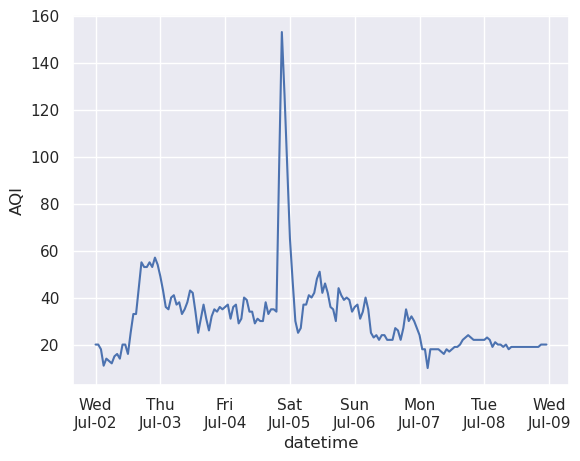

In [7]:
import seaborn as sns   # for nice-looking graphs
import matplotlib.pyplot as plt   # for axis labels
import matplotlib.dates as mdates   # for datetime formatting

sns.set_theme()  # use a theme with grid lines

# Format dates on the x-axis: show weekday ("%a") on one line,
# and month-day ("%b-%d") on the next line.
date_format = mdates.DateFormatter('%a\n%b-%d')
plt.gca().xaxis.set_major_formatter(date_format)

# draw the plot
sns.lineplot(
    data=aqi_data, 
    x='datetime', 
    y='AQI'
)

<div class="alert alert-success">

**Explore the new table above…**

* ⏰ How might the new `datetime` column help with analysis?  

* ❓ What questions do you still have about what we’ve done here?  

</div>


**Summary:** You now know how to work with `datetime`, plot line graphs, and explore trends over time using a measure.  

Now let’s apply these skills to a more interactive data investigation.  


<hr style="border: 5px solid #003262;" />

# Getting Clear on Air Quality: An Investigation of Pollutants During San Francisco's Orange Skies Day.

On September 9, 2020, residents of the San Francisco Bay Area woke up to a sky glowing deep orange.  
<br/>
This “Orange Skies Day” was caused by intense wildfires and weather conditions that trapped particulate matter high in the atmosphere, creating the dramatic effect.  


<div style="display: flex; justify-content: space-around;">
<br/>

<img src="bridge.jpg" width="250"> 
<br/>

<img src="financial.jpg" width="250"> 
<br/>

<img src="nature.jpg" width="250"> 
<br/>

</div>
<br/>

In this activity, we’ll examine hourly air quality measurements from Richmond, CA (just north of San Francisco) taken between Sept 3 and Sept 17, 2020.  
<br/>
(XXX might replace this with something closer to SF but the readings will be similar.)


<hr style="border: 1px solid #fdb515;" />

## Part I: Loading the data

First, let’s preview the dataset we’ll work with. 

👉 Before you run the next cell, take a moment to predict which attributes (columns) you expect to see.  


In [10]:
fire_data = pd.read_csv('sept2020.csv')

fire_data # this will show the first 5 records and the last 5 records in the dataset.

,pollutant,date_local,time_local,date_gmt,time_gmt,value,units_of_measure,datetime_local
0,Carbon monoxide,2020-09-03,00:00,2020-09-03,08:00,0.7,Parts per million,2020-09-03 00:00:00
1,Carbon monoxide,2020-09-03,01:00,2020-09-03,09:00,0.7,Parts per million,2020-09-03 01:00:00
2,Carbon monoxide,2020-09-03,02:00,2020-09-03,10:00,NaN,Parts per million,2020-09-03 02:00:00
3,Carbon monoxide,2020-09-03,03:00,2020-09-03,11:00,0.6,Parts per million,2020-09-03 03:00:00
4,Carbon monoxide,2020-09-03,04:00,2020-09-03,12:00,0.7,Parts per million,2020-09-03 04:00:00
...,...,...,...,...,...,...,...,...
1075,PM2.5,2020-09-17,19:00,2020-09-18,03:00,8.0,Micrograms/cubic meter (LC),2020-09-17 19:00:00
1076,PM2.5,2020-09-17,20:00,2020-09-18,04:00,8.0,Micrograms/cubic meter (LC),2020-09-17 20:00:00
1077,PM2.5,2020-09-17,21:00,2020-09-18,05:00,7.0,Micrograms/cubic meter (LC),2020-09-17 21:00:00
1078,PM2.5,2020-09-17,22:00,2020-09-18,06:00,5.0,Micrograms/cubic meter (LC),2020-09-17 22:00:00


<div class="alert alert-success">

* 🔍 What do you notice and wonder about the dataset above?  

* ❓ What questions could you explore with this dataset?  

* 📊 What extra information would help you interpret these readings?  

</div>


Let’s look at some summary statistics to get a better sense of the data.  

We’ll use the `describe()` function, which you’ve seen before.  

Notice that different measurements are stored in the same column.  
We can use `groupby` to treat them separately.  


In [11]:
# show summary statistics, but do it by the different pollutant groups.
fire_data.groupby('pollutant').describe()

value                                                       \
                 count       mean        std    min     25%     50%     75%   
pollutant                                                                     
Carbon monoxide  336.0   0.973810   0.500595  0.300   0.600   0.700   1.525   
Ozone            336.0   0.024304   0.013777  0.002   0.015   0.023   0.030   
PM2.5            359.0  50.398329  48.513145  0.000  13.000  27.000  86.000   

                          
                     max  
pollutant                 
Carbon monoxide    2.100  
Ozone              0.081  
PM2.5            196.000

<hr style="border: 1px solid #fdb515;" />

As you can see, different pollutants are measured on different scales. To know what’s meaningful, we need some context on how they are measured and what the EPA considers safe.  

Here are key details about the pollutants in this dataset, along with current EPA standards:  



### **1. PM2.5**  
Very fine particles (e.g., black carbon, ash) that can irritate lungs and even enter the bloodstream.  
Measured in micrograms per cubic meter.  

| Range (µg/m³) | Category                       |
|---------------|--------------------------------|
| 0–12          | Good                           |
| 12.1–35.4     | Moderate                       |
| 35.5–55.4     | Unhealthy for Sensitive Groups |
| 55.5+         | Unhealthy for All              |


### **2. Ozone (O₃)**  
Naturally in the upper atmosphere, but also formed at ground level from vehicle emissions + heat/light.  
Can trigger asthma and other respiratory issues.  

| Level (ppm) | Category  |
|-------------|-----------|
| >0.071      | Marginal  |
| >0.081      | Moderate  |
| >0.093      | Serious   |



### **3. Carbon Monoxide (CO)**  
Interferes with oxygen transport in blood.  
High levels cause poisoning; lower levels can cause headaches, nausea, and cognitive effects.  
Main sources: motor vehicles, heating, and cooking appliances.  

| Level (ppm)                         | Category |
|-------------------------------------|----------|
| >9 (8-hour avg) or >35 (1-hour avg) | Harmful  |
---


### Part II: Visualizing the Data Over Time

We’ll visualize pollutant concentrations with line plots for the days before, during, and after the September 2020 “Orange Skies” event.

👉 Below, run the code to plot **PM2.5** levels.


<div class="alert alert-success">

**Before we create the line plot, consider:**

* 🔍 What do you expect the PM2.5 plot to look like?  

* 🌫️ If you plotted the other pollutants, what patterns would you expect?  

</div>


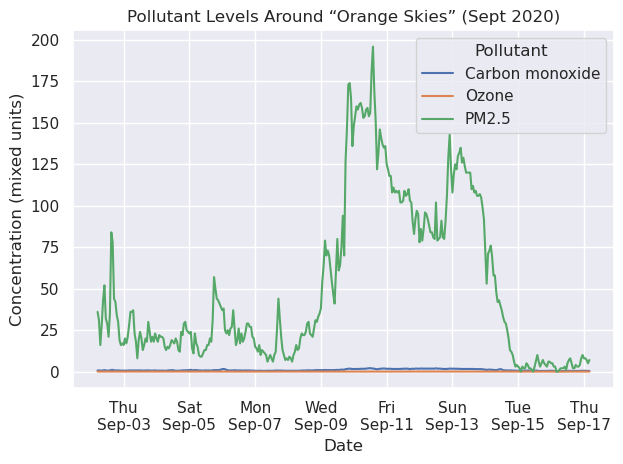

In [30]:
# Plot the three pollutants together.
# (Scales differ: PM2.5 dominates, O3/CO are harder to see.)

# Ensure we have a proper datetime column
fire_data['datetime'] = pd.to_datetime(fire_data['datetime_local'])

# ----- Formatting -----
# Weekday on first line, month-day on second
date_format = mdates.DateFormatter('%a\n%b-%d')
plt.gca().xaxis.set_major_formatter(date_format)

# Show a tick every 48 hours
locator = mdates.HourLocator(interval=48)
plt.gca().xaxis.set_major_locator(locator)

# ----- Plot -----
sns.lineplot(
    data=fire_data,
    x='datetime',
    y='value',
    hue='pollutant'
)


plt.title('Pollutant Levels Around “Orange Skies” (Sept 2020)')
plt.xlabel('Date')
plt.ylabel('Concentration (mixed units)')
plt.legend(title='Pollutant', loc='best')
plt.tight_layout()


<div class="alert alert-success">

* 🤔 Is this what you expected? Why or why not?  

* 🔍 What do you notice or wonder here?  

* 📈 Which parts look like "signal" and which like "noise"?  

* ❓ What more would help you understand how air quality changed during the "Orange Skies" event?  

</div>


---

### Part III: Visualizing Trends for Each Pollutant

Since these pollutants are measured on very different scales, it’s helpful to view them separately.  

Below, we’ll filter the data to show only **PM2.5** and create a line plot.  


<Axes: xlabel='datetime', ylabel='value'>

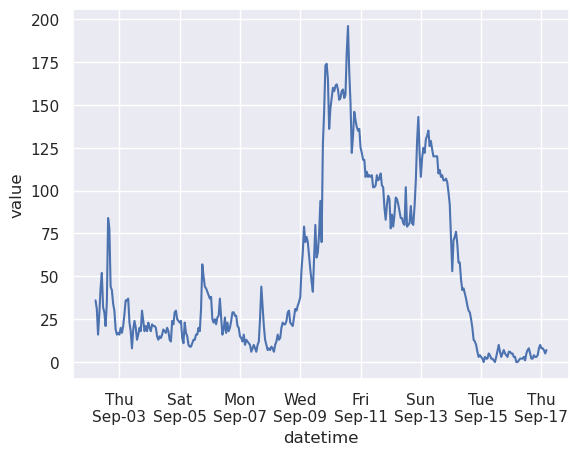

In [31]:
# ----- Formatting -----
# Show weekday on one line, month-day on the next
date_format = mdates.DateFormatter('%a\n%b-%d')
plt.gca().xaxis.set_major_formatter(date_format)

# Show a tick every 48 hours
locator = mdates.HourLocator(interval=48)
plt.gca().xaxis.set_major_locator(locator)

# ----- Filter to pollutant -----
pm25_data = fire_data[fire_data['pollutant'] == "PM2.5"] #Try Here

# ----- Plot -----
sns.lineplot(data=pm25_data, x='datetime', y='value')


What trends do you expect for the other pollutants?  

👉 Edit and run the code above to explore **PM2.5**, **Ozone (O₃)**, and **Carbon Monoxide (CO)** separately so each pattern is visible on an interpretable scale.


<div class="alert alert-success">

* 🔍 What new things did you notice when looking at the plots separately?  

* 📊 What helped you make sense of each pollutant’s plot? What more would be useful?  

* ❓ What questions do you still have?  

</div>


---

### Part IV: Looking Across Pollutants Simultaneously

You may have noticed that not all pollutants rose or fell at the same time during the wildfires.  

In time series analysis, it can be helpful to align multiple plots to compare values at the same point in time.  

Below, we generate a plot with all three pollutants shown together.  


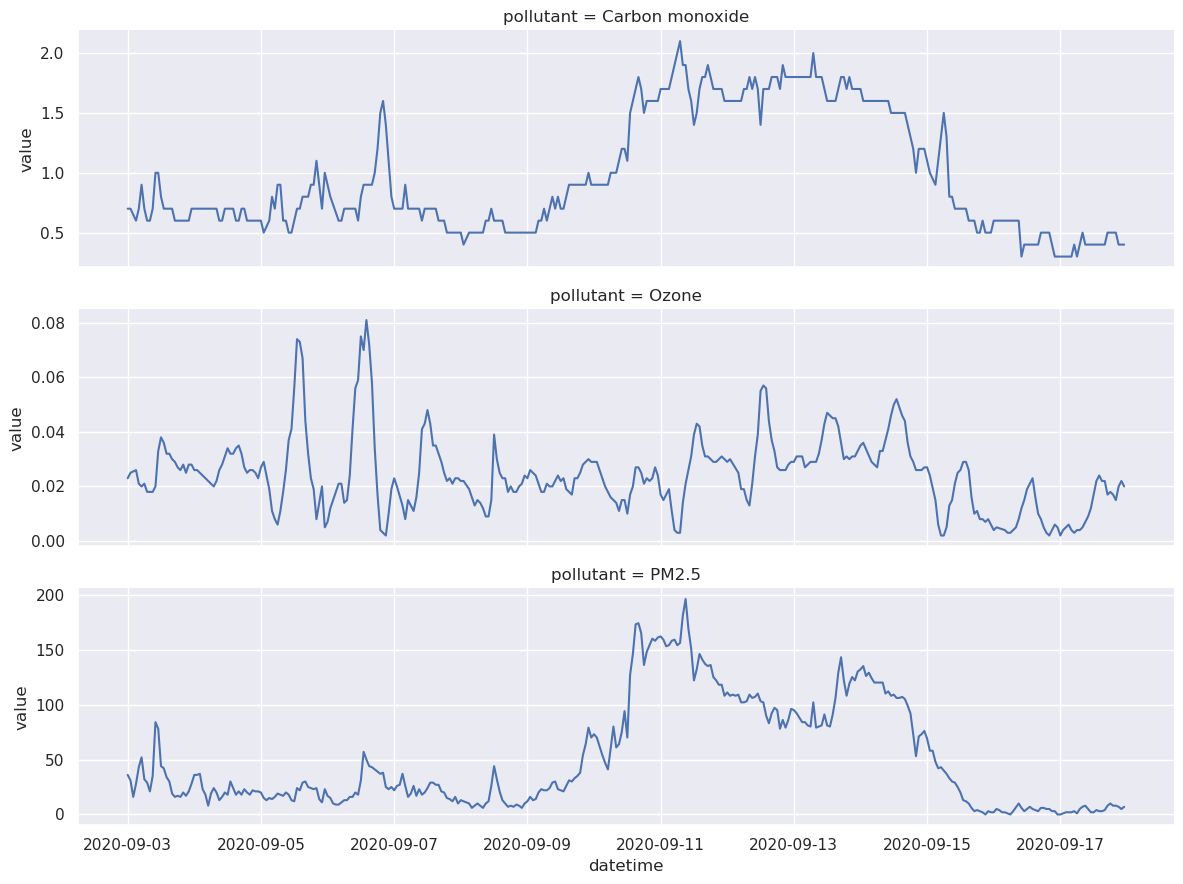

In [32]:
g = sns.FacetGrid(fire_data, 
                  row="pollutant", 
                  aspect=4, # this makes the graphs 4x wider than they are tall
                  sharey=False)

g.map(sns.lineplot, "datetime", "value")

<div class="alert alert-success">

* 🔍 Which patterns among the three graphs are worth discussing? Why? 

* 📖 If you had to tell the story of air quality during these weeks, what story would you tell?  

* 🌞 Do you see anything interesting with Ozone? Why or why not?  

* 📉 There’s a dip in PM2.5 between 9/11 and 9/20, but not in CO. Why might this be? Is it worth attention?  

* ❓ What new questions do these graphs raise for you?  

</div>


<hr style="border: 1px solid #fdb515;" />

# Where Else Do We See Time Series?

The skills you just practiced, creating `datetime` objects and plotting line graphs, are foundational for analyzing any data with a time component.  

Think about how you could apply this same "bundle" of skills in other areas:  

* **Ecology:** Track predator and prey populations over decades to see cycles.  

* **Social Studies / History:** Plot immigration rates, GDP, or census data to analyze trends.  

* **Finance:** Analyze a company’s stock price over a year to identify volatility.  

* **School Improvement:** Plot daily attendance to spot weeks with low participation.  

👉 Any time you ask a question involving **“over time,”** these tools and concepts are a strong place to start.  


---

## In the Classroom

This notebook models a core scientific activity: observing, processing, and visualizing time series data to find patterns.  

**How to Use This in a Lesson:**  

* **Science:** In Earth or Environmental Science, students could explore real-world pollution data. 
    
  👉 Example questions: *Are pollution levels higher at certain times of day? In certain seasons?* Students could modify the code to filter for different time periods.  

* **Math:** In a statistics or data analysis unit, focus on the visualization itself.  

  👉 Why is a line graph appropriate? What does a sharp spike represent? Which rises and falls are meaningful signals, and which are just noise?  

❓ What other air quality events or patterns might be worth exploring?  


Credit
<br/>

North Complex smoke in San Francisco - Bay Bridge and Financial District.jpg  North Complex smoke in San Francisco - Financial District.jpg by Christopher Michel / Wikipedia / CC-BY-2.0.
<br/>

Observing the Orange Sky in San Francisco, California, USA, September 9, 2020.jpg by Semiautonomous / Wikipedia / CC-BY-SA-4.0.
<br/>